# Preprocesamiento de datos caso Cotton Plus

Con el propósito de aterrizar los conceptos y tareas llevadas a cabo en la etapa de preprocesamiento de datos en la construcción de un modelo mediante técnicas de Machine Learning, se propone la manipulación del dataset "Data DS Cotton Plus_new.xlsx" con los pasos típicos en este importante proceso de preparación. 

## Breve descripción de la información del dataset

## Librerías requeridas

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura del dataset "Data DS Cotton Plus_new"

In [91]:
data_raw = pd.read_excel("Data DS Cotton Plus_new.xlsx")
data_raw.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,...,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,...,NaN,NaN,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,...,NaN,NaN,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,...,NaN,NaN,0,0,0,0,0,0,0,0


## Análisis descriptivo

### Identificación de variables

In [92]:
data_raw.info()
data_types = data_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 40 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Cedula                                                            9976 non-null   int64  
 1   Nombre Completo                                                   9976 non-null   object 
 2   Segmento                                                          9976 non-null   object 
 3   Compro 2019?                                                      9976 non-null   object 
 4   Compro 2020?                                                      9976 non-null   object 
 5   Monto Comprado 2019?                                              9976 non-null   int64  
 6   Nro Transacciones 2019                                            9976 non-null   int64  
 7   Monto Comprado 2020              

In [93]:
# do Exist duplicated?
data_raw.duplicated().sum()
# data.drop_duplicates()

0

#### Variables Categóricas

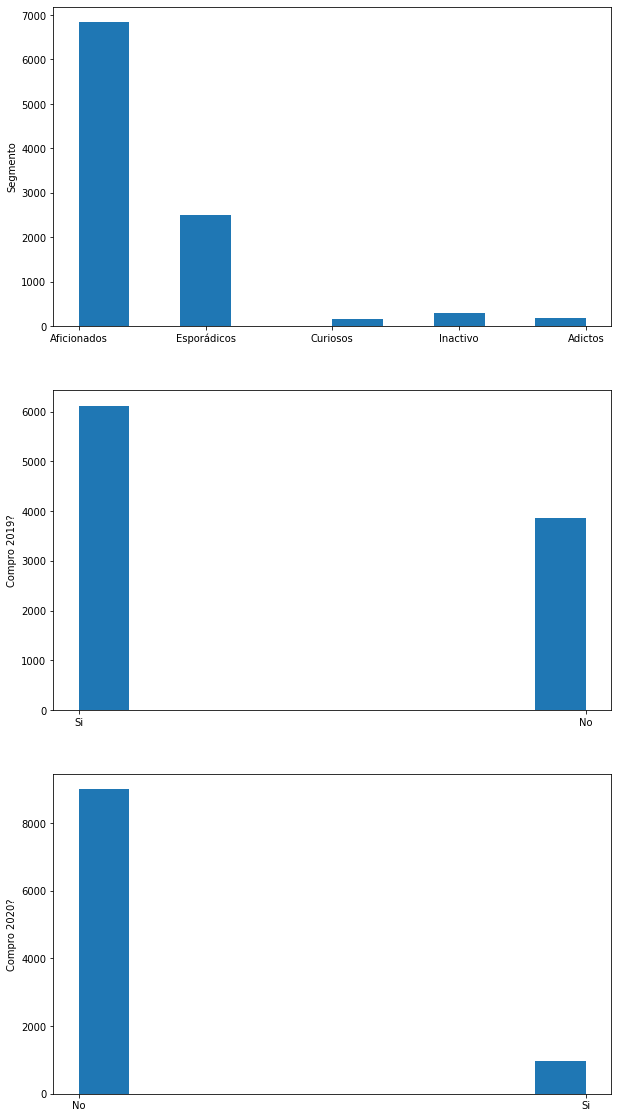

In [113]:
# Show hist about category variables
data_types_categoric = data_raw.select_dtypes(include=["object"]).columns

f_dims = (10, 20)
fig, ax = plt.subplots(3, 1, figsize=f_dims)

ax[0].hist(data_raw["Segmento"])
ax[0].set_ylabel("Segmento")

ax[1].hist(data_raw["Compro 2019?"])
ax[1].set_ylabel('Compro 2019?')

ax[2].hist(data_raw["Compro 2020?"])
ax[2].set_ylabel('Compro 2020?')
plt.show()



In [120]:
data_raw["Ciudad de Residencia"].value_counts()[data_raw["Ciudad de Residencia"].value_counts() > 5];

In [121]:
print(data_raw.isnull().sum()[data_raw.isnull().sum() > 0])
data_raw.shape
''' Variables null
Mail               9976
Direccion          9976
Telefono Movil     9976
TelefonoOficina    9976
Telefono Casa      9976
Estado Civil       9413  -> few relevant data
'''

Series([], dtype: int64)


' Variables null\nMail               9976\nDireccion          9976\nTelefono Movil     9976\nTelefonoOficina    9976\nTelefono Casa      9976\nEstado Civil       9413  -> few relevant data\n'

#### Variables numéricas

In [122]:
# data_raw.__get__numeric_data() -> TODO: validate this
# columns_str_dummies = [i for i in data_new.columns if not i in data_new._get_numeric_data()]
data_types_numeric = data_raw.select_dtypes(include=["int", "float"]).columns
data_raw["Edad"].describe()

count    9976.000000
mean       40.361868
std        26.029822
min        10.000000
25%        25.000000
50%        31.000000
75%        44.000000
max       111.000000
Name: Edad, dtype: float64

In [124]:
print(data_types_categoric);
print(data_types_numeric);
## This is good
data_raw["Segmento"].unique();

Index(['Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Es Contactable', 'Ciudad de Residencia', 'Genero', 'Mes Nacimiento',
       'Direccion Valido?', 'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?',
       'Tel Casa Valido?'],
      dtype='object')
Index(['Cedula', 'Monto Comprado 2019?', 'Nro Transacciones 2019',
       'Monto Comprado 2020', 'Nro Transacciones 2020', 'Tipo de Contacto',
       'Fecha Nacimiento', 'Dia Nacimiento', 'Edad',
       'Monto Total de ultima compra', 'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)',
       'Monto - MARCA COTTON- B/quilla', 'Monto - MARCA COTTON- Bucaramanga',
       'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira',
       'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto',
       'Monto - MARCA COTTON- Cable Plaza'],
      dtype='object')


### Exploración inicial del comportamiento de las variables

Realizar una exploración y visualización inicial del comportamiento y distribución de los datos sin manipular. 

Calcular medidas de **tendencia central** y de **posición**. 

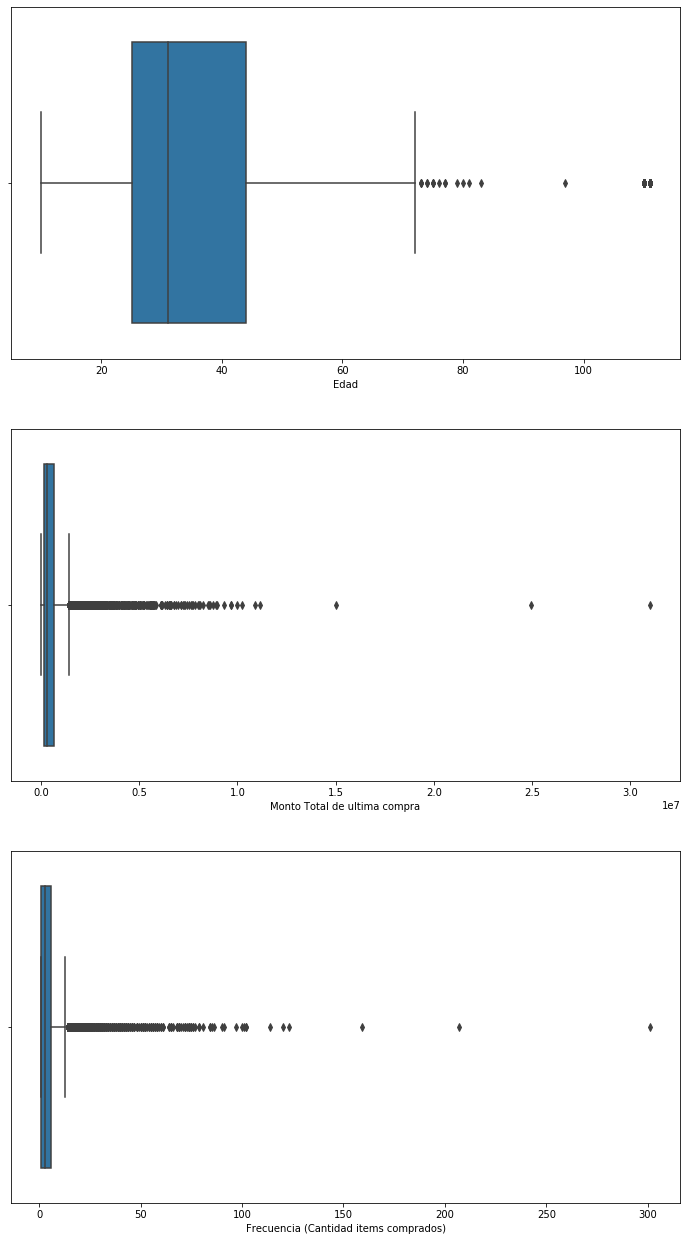

In [156]:
plt.rcParams['figure.figsize'] = (12,22)
fig, ax = plt.subplots(3,1)
sns.boxplot(x=data_raw["Edad"], ax=ax[0])
sns.boxplot(x=data_raw["Monto Total de ultima compra"], ax=ax[1])
sns.boxplot(x=data_raw["Frecuencia (Cantidad items comprados)"], ax=ax[2]);

## Extracción de características

### Depuración de variables

In [126]:
print(data_raw.isnull().sum()[data_raw.isnull().sum() > 0])
null_columns = ["Mail", "Direccion", "Telefono Movil", "Estado Civil", "TelefonoOficina", "Telefono Casa"]
data_raw = data_raw.drop(columns=null_columns, axis=1)

Series([], dtype: int64)


KeyError: "['Mail' 'Direccion' 'Telefono Movil' 'Estado Civil' 'TelefonoOficina'\n 'Telefono Casa'] not found in axis"

In [127]:
data_raw.columns
# corr.abs().idmax() -> Max corelation 


Index(['Cedula', 'Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Tipo de Contacto', 'Es Contactable',
       'Ciudad de Residencia', 'Genero', 'Fecha Nacimiento', 'Mes Nacimiento',
       'Dia Nacimiento', 'Edad', 'Monto Total de ultima compra',
       'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)', 'Direccion Valido?',
       'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?',
       'Monto - MARCA COTTON- B/quilla', 'Monto - MARCA COTTON- Bucaramanga',
       'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira',
       'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto',
       'Monto - MARCA COTTON- Cable Plaza'],
      dtype='object')

In [128]:
# Monto - Brand Store Cucuta -> All is 0 for this rason I delete
# data_raw["Monto - MARCA COTTON- Cable Plaza"].value_counts()
data_raw = data_raw.drop(["Monto - Brand Store Cucuta"], axis=1)

KeyError: "['Monto - Brand Store Cucuta'] not found in axis"

#### Change Column name

In [129]:
data_raw.rename(columns={'Monto - MARCA COTTON- B/quilla.': 'Monto - MARCA COTTON- B/quilla'}, inplace=True)

### Limpieza de datos

Registers un data are complete

In [138]:
registers = data_raw.shape[0]
print(registers)
data_raw.info()

9976
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 33 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Cedula                                                            9976 non-null   int64 
 1   Nombre Completo                                                   9976 non-null   object
 2   Segmento                                                          9976 non-null   object
 3   Compro 2019?                                                      9976 non-null   object
 4   Compro 2020?                                                      9976 non-null   object
 5   Monto Comprado 2019?                                              9976 non-null   int64 
 6   Nro Transacciones 2019                                            9976 non-null   int64 
 7   Monto Comprado 2020                  

### Validate feactures relevant

In [152]:
# Using correlation
data_corr = data_raw.corr()

In [154]:
for x in range(data_corr.shape[0]):
  data_corr.iloc[x,x] = 0.0
data_corr.abs().idxmax();



### Change some Columns from object to int ot floar

In [158]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 33 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Cedula                                                            9976 non-null   int64 
 1   Nombre Completo                                                   9976 non-null   object
 2   Segmento                                                          9976 non-null   object
 3   Compro 2019?                                                      9976 non-null   object
 4   Compro 2020?                                                      9976 non-null   object
 5   Monto Comprado 2019?                                              9976 non-null   int64 
 6   Nro Transacciones 2019                                            9976 non-null   int64 
 7   Monto Comprado 2020                       

In [173]:
data

Index(['Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Es Contactable', 'Ciudad de Residencia', 'Genero', 'Mes Nacimiento',
       'Direccion Valido?', 'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?',
       'Tel Casa Valido?'],
      dtype='object')

In [177]:
data_raw["Genero"].value_counts()

Mujer     5980
Hombre    3996
Name: Genero, dtype: int64

### Creación de nuevas características

In [166]:
# cuales son las caracteristicas que tenemos, podemo shacer algo que nos aporte algo mas a nuestro 
# modelo o es redundante
data_play = data_raw.copy(deep=True)

In [178]:
data_raw = data_raw.replace({"Compro 2020?": 'Si'}, 1)
data_raw = data_raw.replace({"Compro 2020?": 'No'}, 0)
data_raw = data_raw.replace({"Genero": "Mujer"}, 0)
data_raw = data_raw.replace({"Genero": "Hombre"}, 1)

### Transformación del tipo de variable (En caso de ser necesario)

### Identificación de valores atípicos (Outliers)

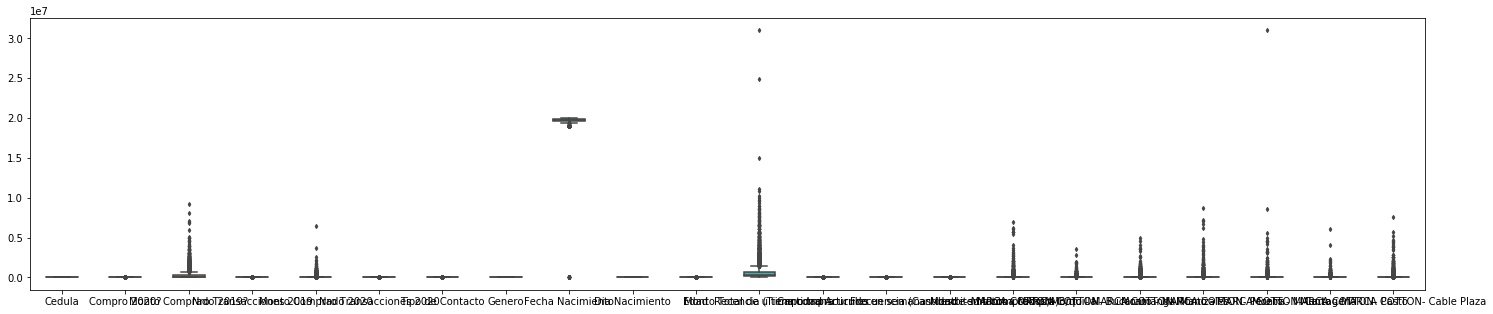

In [179]:
fig, ax = plt.subplots(figsize=(25,5))
sns.boxplot(data=data_raw, width= 0.5,ax=ax,  fliersize=3)

#### Tratamiento de valores atípicos (Outliers)

## Codificación de variables categóricas

Mediante la identificación de las variables categóricas, se requiere realizar la codificación (creación de variables ficticias) de las mismas con el fin de poder tratarlas en un algoritmo de Machine Learning. 

Es posible realizar este procedimiento con [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) o [sklearn.preprocessing.OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

Identificar la diferencia entre los anteriores.

## Escalado de datos

En esta etapa se requiere llevar los datos a una misma escala, realizar el proceso haciendo uso de los siguientes métodos:

- [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
- [scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

Revisar y analizar el comportamiento obtenido con ambos métodos.

### MinMaxScaler()

### scale